# Project 6 (part a):

## The Game of Life
The Game of Life is a cellular automaton devised by the British mathematician John Horton Conway in 1970.<img align="right" src="Grid.png" HEIGHT="400" WIDTH="266"> 

The "game" is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves.

The universe of the Game of Life is an infinite two-dimensional array of square cells, each of which is in one of two possible states:

- alive: cell has value = 1
- dead: cell has value = 0

Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. See Figure 1.

## Rules of the game:

At each step in time (also called "tick"), the following transitions occur to all cells simultaneously:

1. Any live cell with fewer than two live neighbours dies, as if caused by underpopulation.

2. Any live cell with two or three live neighbours lives on to the next generation.

3. Any live cell with more than three live neighbours dies, as if by overpopulation.

4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [1]:
# Weekly functions (until I build a module to import) & imports
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def GeneralListPlot(XList, YList, xlabel, ylabel):
    """A general function to plot 2 lists of floats, and label their axes"""
    plt.plot(XList, YList)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return()

In [2]:
### T H E  G A M E ###
#
#
def loaddata(location, plot = 0):
    """Loads data from .txt file, into a world var. Use plot = 1 to show the initial state"""
    world = np.loadtxt(location ,dtype=np.int8)
    paddedworld = np.pad(world, 3, 'constant')
    if plot == 1:
        plt.imshow(world,cmap=plt.cm.binary,interpolation='nearest') #For if you want to just see the initial shape
    return(paddedworld)

def SurroundCheck(world, x, y):
    sum_ = world[x-1, y-1] + world[x, y-1] + world[x+1,y-1] + world[x-1,y] + world[x+1,y] + world[x-1, y+1] + world[x, y+1] + world[x+1, y+1]
    return(sum_)


# def worldpad(world):
#     """Pads the 'world' matrix with 0s on all sides"""
#     paddedworld = np.zeros([len(world)+2, len(world)+2])
#     for i in world:
#         for j in world:
#             paddedworld[i+1][j+1] = world[i][j]
#     print(paddedworld)
#     return(world)


def GameRun(location, framecnt = 100):
    world = loaddata(location)
    framearray = [(world)]
    framearray.append(world)
    x = world[:,1]
    y = world[1,:]
    newworld = np.zeros([len(x),len(y)])
    for k in range(framecnt):
        for i in range(1, len(x)-3):
            for j in range(1, len(y)-3):
                SC = SurroundCheck(world, i, j)
                if SC < 2:
                    newworld[i][j] = 0
                elif SC > 3:
                    newworld[i][j] = 0
                elif SC == 2:
                    newworld[i][j] = world[i][j]
                elif SC == 3:
                    newworld[i][j] = 1
        framearray.append(newworld)
        world = newworld
    return(framearray)


# world = loaddata('data/Loaf.txt')

# print(world)


GameRun('data/Pulsar.txt')

## 1: Study  of ``still`` ``lifes`` and ``oscillators``:  [3 marks]

For the following shapes from the data folder:
- Loaf ("data/Loaf.txt")
- Pulsar ("data/Pulsar.txt")
- Pentadecathlon ("data/Pentadecathlon.txt")

Find the number of live cells and the $r_{max}$  as a function of time (number of steps).<br>

Can you determine the period of the above 3 shapes from these plots?<br>
Hint: One of the shapes does not change at all, the other 2 return back to their original configuration after certain steps.

$r_{max}$ is defined as:<br>
- Given N live cells at positions  ($i$,$j$) 
- Calculate the population "barycenter" ($center_{i}$,$center_{j}$), where $center_{i} =\frac{\sum_{i}^{N} i }{N}$ and $center_{j} =\frac{\sum_{j}^{N} j }{N}$
- Define the distance : $r_{i,j}= \sqrt{(i-center_i)^2+(j-center_j)^2}$ 
- $r_{max}$ is the maximum of all the $r_{i,j}$ i.e the distance of the furthest cell from the "barycenter" of the population.

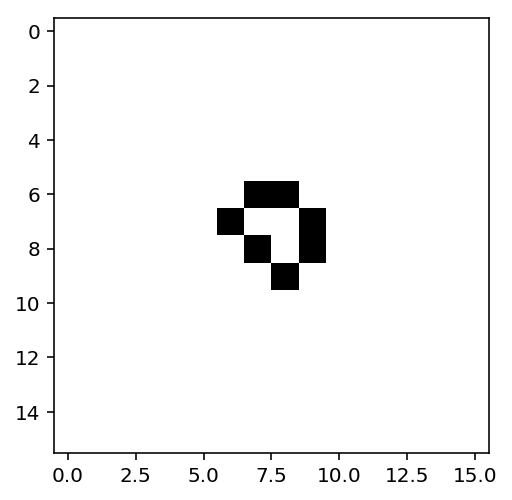

In [3]:
#All the lecture code (with some cleanup): (Comments in this are not very useful: 1/4)
#
#Example of reading a file to an array and plotting the initial cells configuration
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML
world = np.loadtxt('data/Loaf.txt',dtype=np.int8)
plt.imshow(world,cmap=plt.cm.binary,interpolation='nearest')


#Set the size of the produced figure
plt.rcParams['figure.figsize'] = 6, 4

#Set up the matplotlib animation
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "html5"

#Data Generator
def generate(x, y):
    return np.sin(x) + np.cos(y)


#ArtistAnimation
#Given a list of frames/"artists"
#we pass them to the animation
# def animateArtist(frames,inputInterval):
#     fig = plt.figure()
#     x = np.linspace(0, 2 * np.pi, 30)
#     y = np.linspace(0, 2 * np.pi, 25).reshape(-1, 1)

#     #List of frames
#     ims = []
#     for i in range(frames):
#         x += np.pi / 15.
#         y += np.pi / 20.
#         #Get the image/"artist" by callinge the function
#         im = plt.imshow(generate(x, y), animated=True)
#         ims.append([im])

#     plt.close()

#     #create the animation 
#     anim=animation.ArtistAnimation(fig, ims, interval=inputInterval,blit=True)
#     display(anim)
#     pass

# animateArtist(100,50)


#Function animation creates the frames on demand 
# A callable "func" argument is called for each frame 
# to provide the relevant data

def animateFunction(inputFrames,inputInterval):
    fig = plt.figure()
    x = np.linspace(0, 2 * np.pi, 30)
    y = np.linspace(0, 2 * np.pi, 25).reshape(-1, 1)
    im = plt.imshow(generate(x, y), animated=True)

    #the FuncAnimation will call this function                 (This is only used in this function, doesn't need to be a function: -0.5 marks)
    #for frame in range(frames)
    def animate(frame):
        localx=x+ frame * np.pi / 15
        localy=y+ frame * np.pi / 20.
        im.set_data(generate(localx,localy))
        return (im,)


    plt.close()
    #create the animation
    anim=animation.FuncAnimation(fig, func=animate, frames=inputFrames,interval=inputInterval,blit=True)
    display(anim)
    #anim.save('SomeName.gif',writer='imagemagick')
    pass

# animateFunction(100,50)

In [4]:
#1: Study of still lifes and oscillators:
#
#


# loafworld = loaddata('data/Loaf.txt')
# pulsarworld = loaddata('data/Pulsar.txt')
# pentadecathlonworld = loaddata('data/Pentadecathlon.txt')

def LiveCells(framesarray, inputInterval):
    """Sum all the 1s in the lists/array"""
    ns = []
    for i in framearray:
        ns.append(sum(framearray[i]))
    return(ns)


# def r_max
#     """Find locations of cells using i,j loop (reading the i and j of each 1 into a matrix/list), then sub these into the equations"""

## 2: Simple animations :  [3 marks]

For the following shapes from the data folder:
- Blinker ("data/Blinker.txt")
- Pulsar ("data/Pulsar.txt")
- Pentadecathlon ("data/Pentadecathlon.txt")

Produce animations for each one. 

Hint : Use the results of the previous exercise in order to determine the minimum number of frames where applicable (typically you will not need more the 20 frames or so).

In [5]:
# 2: Simple animations :
pulsararray = GameRun('data/Pulsar.txt', 100)
animateFunction(pulsararray, 50)
# # fig = plt.figure()
# # anim=animation.ArtistAnimation(fig, pulsararray, interval=50,blit=True)
# # display(anim)


# hmpf = np.ones([4,4])
# hmpf[2][1] = 0
# imagelist = pulsararray

# fig = plt.figure() # make figure

# # make axesimage object
# # the vmin and vmax here are very important to get the color map correct
# im = plt.imshow(imagelist[0], cmap=plt.get_cmap('jet'), vmin=0, vmax=255)

# # function to update figure
# def updatefig(j):
#     # set the data in the axesimage object
#     im.set_array(imagelist[j])
#     # return the artists set
#     return [im]
# # kick off the animation
# ani = animation.FuncAnimation(fig, updatefig, frames=range(20), interval=50, blit=True)
# plt.show()

Traceback (most recent call last):
  File "/ext/anaconda5/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "/ext/anaconda5/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/ext/anaconda5/lib/python3.6/site-packages/matplotlib/animation.py", line 1026, in _start
    self._init_draw()
  File "/ext/anaconda5/lib/python3.6/site-packages/matplotlib/animation.py", line 1750, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/ext/anaconda5/lib/python3.6/site-packages/matplotlib/animation.py", line 1772, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-3-669725425ad3>", line 64, in animate
    localx=x+ frame * np.pi / 15
ValueError: operands could not be broadcast together with shapes (30,) (23,23) 


ValueError: operands could not be broadcast together with shapes (30,) (23,23) 

## 3: Replicator :  [4 marks]

Conway's Life is classified as following the $\textbf{B}$3/$\textbf{S}$23 rule.

Specifically a cell:
- is $\textbf{B}$orn if it has exactly 3 neighbours
- $\textbf{S}$urvives if it has 2 or 3 living neighbours 
- it dies otherwise.

Another member in the family of "Life" cellular automata is ``HighLife`` that follow the $\textbf{B}$36/$\textbf{S}$23 rule.

A cell:
- is $\textbf{B}$orn if it has 3 or 6 neighbours
- $\textbf{S}$urvives if it has 2 or 3 living neighbours 
- it dies otherwise.


Following the HighLife rules and  employing the Replicator pattern present in the data folder ("data/Replicator.txt").

1. Evolve it for 36 generations.
2. Produce an animation of the above 36 frames showing the system evolution
3. Plot the Number of cells versus time
4. Plot the  $r_{max}$ as a function of time
5. Can you see why it is called a "Replicator"?